### Import Datasets

In [1]:
import pandas as pd
import numpy as np

# import tables
product = pd.read_csv("C:\\Users\\Joyce\\OneDrive - Emory University\\Desktop\\Emory MSBA\\Marketing Analytics\\Team 8-Project1\\Pernalonga\\product_table.csv")

# join trans and product tables based on "prod_id"
#all_df = pd.merge(trans,product, on ='prod_id')
#all_df['total_promo'] = all_df['tran_prod_sale_amt'] - all_df['tran_prod_paid_amt']
#all_df['promo_prop'] = all_df['tran_prod_offer_cts'] / all_df['tran_prod_sale_qty']
#all_df.to_csv('all_df.csv',index=False)

# all_df dataframe is generated above and saved to local csv file, the file comes within the code folder
all_df = pd.read_csv("C:\\Users\\Joyce\\OneDrive - Emory University\\Desktop\\Emory MSBA\\Marketing Analytics\\Team 8-Project1\\all_df.csv")


In [2]:
len(all_df)

29617075

In [3]:
all_df.head()

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng,total_promo,promo_prop
0,139662,2.017110e+18,2017-11-03,584,145519008,CT,2.89,4.0,0.00,0,2.89,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,0.00,0.00
1,799924,2.017111e+18,2017-11-12,349,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25
2,1399898,2.017102e+18,2017-10-21,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25
3,1399898,2.017111e+18,2017-11-11,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25
4,1399898,2.017121e+18,2017-12-05,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25


In [4]:
# create unique Identifier based on customer ID and transaction date
all_df['id'] = all_df.groupby(['cust_id','tran_dt']).ngroup()

In [76]:
##### Data Summary Statistics

# unique products and category
all_df['prod_id'].nunique() #10767
all_df['category_id'].nunique()

429

In [77]:
#### Filter the transactions based on two product units: count and kg
product_ct = all_df[all_df['prod_unit'] =='CT']
product_kg = all_df[all_df['prod_unit'] =='KG']

In [79]:
# count of products in ct table
product_ct['prod_id'].count()

22370880

In [80]:
# count of products in kg table
product_kg['prod_id'].count()

7246195

In [111]:
# number of unique categories
all_df['category_id'].nunique()

429

In [112]:
# number of unique sub-categories
all_df['subcategory_id'].nunique()

1476

In [110]:
# count of products in each category
all_df['category_desc_eng'].value_counts()

BAGS                  854423
FINE WAFERS           663634
FRESH PORK            632046
MINERAL WATERS        630928
FRESH POULTRY MEAT    597559
                       ...  
LCDS AND PLASMAS          28
FACE CARE                 18
MOBILE PHONES             12
PROTECTION & WORK          8
COMPUTERS                  3
Name: category_desc_eng, Length: 419, dtype: int64

### Product and Category Basic Analysis with Groupings

#### 1.Product (CT)

In [99]:
# find the product that has the most promotion discount count
prod_promo_count = product_ct.groupby(['prod_id','category_desc_eng']).agg({'tran_prod_offer_cts':'sum','tran_prod_sale_qty':'sum','id':'count',
                                                   'tran_prod_paid_amt':'sum','promo_prop':'mean'})
prod_promo_count = prod_promo_count.rename(columns={'tran_prod_offer_cts':'promo_count','id':'trans_frequency','tran_prod_sale_qty':'volume',
                                                    'promo_prop':'promo_prop_avg',
                                                   'tran_prod_paid_amt':'revenue'})

# sort the results descending by promotion count
prod_promo_count.sort_values(by='promo_count',ascending=False).head()

,,promo_count,volume,trans_frequency,revenue,promo_prop_avg
prod_id,category_desc_eng,,,,,
999746519,DRINKS,131728,210213.0,146722,117264.08,0.700980
999951863,FRESH UHT MILK,66996,656033.0,149533,290502.57,0.160783
999421692,OIL,49506,163866.0,98863,190577.59,0.378616
999512554,STRAWBERRY,46343,114216.0,91054,202374.04,0.440980
999958970,FRESH UHT MILK,43492,333713.0,75236,191127.24,0.225081


In [100]:
# sort the results descending by volume
prod_promo_count.sort_values(by='volume',ascending=False).head()

,,promo_count,volume,trans_frequency,revenue,promo_prop_avg
prod_id,category_desc_eng,,,,,
999231999,BAGS,18382,1063089.0,769890,105883.670001,0.018317
999680491,PAO MANUFACTURE,2668,676678.0,79686,57381.260000,0.004951
999951863,FRESH UHT MILK,66996,656033.0,149533,290502.570000,0.160783
999401572,MINERAL WATERS,5991,553960.0,119617,89934.830000,0.018884
999232655,PAO MANUFACTURE,2325,491889.0,75034,58794.610000,0.005542


In [83]:
# sort the results descending by number of transactions appearance 
# traffic driver (KVI)
prod_promo_count.sort_values(by='trans_frequency',ascending=False).head()

,,promo_count,total_promo,trans_frequency,tran_prod_paid_amt,promo_prop_avg
prod_id,category_desc_eng,,,,,
999231999,BAGS,18382,425.23,769890,105883.670001,0.018317
999951863,FRESH UHT MILK,66996,21368.31,149533,290502.570000,0.160783
999746519,DRINKS,131728,8859.87,146722,117264.080000,0.700980
999401500,MINERAL WATERS,6738,755.38,141948,111814.580000,0.032095
999356553,SUGAR,8696,1107.87,123154,125778.490000,0.054766


In [103]:
# sort the results descending by revenue generated
prod_promo_count.sort_values(by='revenue',ascending=False).head()

,,promo_count,volume,trans_frequency,revenue,promo_prop_avg
prod_id,category_desc_eng,,,,,
999951863,FRESH UHT MILK,66996,656033.0,149533,290502.57,0.160783
999345410,OLIVE OIL,26470,83213.0,67387,254840.49,0.350096
999512554,STRAWBERRY,46343,114216.0,91054,202374.04,0.440980
999958970,FRESH UHT MILK,43492,333713.0,75236,191127.24,0.225081
999421692,OIL,49506,163866.0,98863,190577.59,0.378616


In [85]:
# sort the results descending by avg promotion proportion
prod_promo_count.sort_values(by='promo_prop_avg',ascending=False).head()

,,promo_count,total_promo,trans_frequency,tran_prod_paid_amt,promo_prop_avg
prod_id,category_desc_eng,,,,,
999158113,CLOTHING CARE,98,811.42,51,590.63,1.901961
999176518,WASHING MACHINE DETERGENTS,898,4926.63,482,3660.19,1.764523
999162416,WASHING MACHINE DETERGENTS,117,667.98,67,584.16,1.660448
999153536,WASHING MACHINE DETERGENTS,265,1815.13,159,1373.22,1.625786
999153439,WASHING MACHINE DETERGENTS,147,962.90,91,784.17,1.593407


#### 2. Product(KG)

In [104]:
# find the product that has the most promotion discount count
prod_promo_count1 = product_kg.groupby(['prod_id','category_desc_eng']).agg({'tran_prod_offer_cts':'sum','tran_prod_sale_qty':'sum','id':'count',
                                                   'tran_prod_paid_amt':'sum','promo_prop':'mean'})
prod_promo_count1 = prod_promo_count1.rename(columns={'tran_prod_offer_cts':'promo_count','id':'trans_frequency','tran_prod_sale_qty':'volume',
                                                    'promo_prop':'promo_prop_avg',
                                                   'tran_prod_paid_amt':'revenue'})

# sort the results descending by promotion count
prod_promo_count1.sort_values(by='promo_count',ascending=False).head()

,,promo_count,volume,trans_frequency,revenue,promo_prop_avg
prod_id,category_desc_eng,,,,,
999956795,BANANA,179372,566374.282,491580,546554.81,0.371202
999361204,CARROT,132287,224224.169,237895,105823.43,0.760539
999712725,ONION,63364,124311.067,134208,79814.73,0.662541
999967197,TOMATO,62806,82745.893,106926,107971.49,0.940308
999957158,ZUCCHINI,50809,93297.321,123099,127111.22,0.685189


In [105]:
# sort the results descending by total promotion amount
prod_promo_count1.sort_values(by='volume',ascending=False).head()

,,promo_count,volume,trans_frequency,revenue,promo_prop_avg
prod_id,category_desc_eng,,,,,
999956795,BANANA,179372,566374.282,491580,546554.81,0.371202
999361204,CARROT,132287,224224.169,237895,105823.43,0.760539
999749894,FRESH PORK,9241,189019.014,132278,530179.25,0.071205
999953571,CITRUS,42781,187937.555,130550,195262.25,0.270717
999621635,FRESH POULTRY MEAT,6612,168215.189,77223,274373.66,0.039826


In [106]:
# sort the results descending by number of transactions appearance 
# traffic driver (KVI)
prod_promo_count1.sort_values(by='trans_frequency',ascending=False).head()

,,promo_count,volume,trans_frequency,revenue,promo_prop_avg
prod_id,category_desc_eng,,,,,
999956795,BANANA,179372,566374.282,491580,546554.81,0.371202
999361204,CARROT,132287,224224.169,237895,105823.43,0.760539
999712725,ONION,63364,124311.067,134208,79814.73,0.662541
999749894,FRESH PORK,9241,189019.014,132278,530179.25,0.071205
999953571,CITRUS,42781,187937.555,130550,195262.25,0.270717


In [107]:
# sort the results descending by revenue generated
prod_promo_count1.sort_values(by='revenue',ascending=False).head()

,,promo_count,volume,trans_frequency,revenue,promo_prop_avg
prod_id,category_desc_eng,,,,,
999749469,FRESH BEEF,6251,98925.265,99996,602109.43,0.082805
999956795,BANANA,179372,566374.282,491580,546554.81,0.371202
999749894,FRESH PORK,9241,189019.014,132278,530179.25,0.071205
999455829,FRESH POULTRY MEAT,6717,122780.181,112245,482758.42,0.066901
999649801,DRY SALT COD,17449,58416.509,18474,416159.93,0.364968


In [108]:
# sort the results descending by avg promotion proportion
prod_promo_count1.sort_values(by='promo_prop_avg',ascending=False).head()

,,promo_count,volume,trans_frequency,revenue,promo_prop_avg
prod_id,category_desc_eng,,,,,
999235165,MEAT DISHES,3,1.108,4,18.79,3.847162
999167636,OTHER CHOCOLATES,407,239.937,3083,3492.57,3.473291
999723153,TROPICAL,831,392.577,903,1589.30,2.858224
999605399,TROPICAL,484,351.643,1406,3025.53,1.895309
999275929,FRESH BEEF,706,563.593,849,5838.84,1.780731


#### 3. Category

In [113]:
# find the product that has the most promotion discount count
category_promo_count = all_df.groupby(['category_id','category_desc_eng']).agg({'tran_prod_offer_cts':'sum','total_promo':'sum','id':'count','tran_prod_paid_amt':'sum',
                                                           'promo_prop':'mean'})
category_promo_count = category_promo_count.rename(columns={'tran_prod_paid_amt':'revenue','tran_prod_offer_cts':'promo_count','id':'trans_frequency','promo_prop':'promo_prop_avg'})

# sort the results descending by promotion count
category_promo_count.sort_values(by='promo_count',ascending=False).head()

,,promo_count,total_promo,trans_frequency,revenue,promo_prop_avg
category_id,category_desc_eng,,,,,
95991,FINE WAFERS,327904,260396.260000,663634,9.284094e+05,0.428136
95854,YOGURT HEALTH,256974,325039.339999,408153,7.863534e+05,0.282410
95934,BANANA,191541,54599.130000,545534,6.366988e+05,0.358023
95797,FINE WINES,190138,575060.830000,333855,1.296609e+06,0.435643
95861,FRESH UHT MILK,187341,88908.690000,403644,8.593819e+05,0.172813


In [114]:
# sort the results descending by number of transactions appearance
# traffic driver (KVC)
category_promo_count.sort_values(by='trans_frequency',ascending=False).head()

,,promo_count,total_promo,trans_frequency,revenue,promo_prop_avg
category_id,category_desc_eng,,,,,
95677,BAGS,25301,1152.49,854423,1.594546e+05,0.024033
95991,FINE WAFERS,327904,260396.26,663634,9.284094e+05,0.428136
95890,FRESH PORK,54984,41694.53,632046,2.483963e+06,0.092641
95809,MINERAL WATERS,136511,102219.54,630928,6.972579e+05,0.119856
95888,FRESH POULTRY MEAT,51467,64468.24,597559,2.379408e+06,0.070600


In [115]:
# sort the results descending by number of transactions appearance
category_promo_count.sort_values(by='trans_frequency',ascending=False).head()

,,promo_count,total_promo,trans_frequency,revenue,promo_prop_avg
category_id,category_desc_eng,,,,,
95677,BAGS,25301,1152.49,854423,1.594546e+05,0.024033
95991,FINE WAFERS,327904,260396.26,663634,9.284094e+05,0.428136
95890,FRESH PORK,54984,41694.53,632046,2.483963e+06,0.092641
95809,MINERAL WATERS,136511,102219.54,630928,6.972579e+05,0.119856
95888,FRESH POULTRY MEAT,51467,64468.24,597559,2.379408e+06,0.070600


In [119]:
# sort the results descending by avg promotion proportion
category_promo_count.sort_values(by='promo_prop_avg',ascending=False).head(10)

,,promo_count,total_promo,trans_frequency,revenue,promo_prop_avg
category_id,category_desc_eng,,,,,
95914,GREEN BEAN,54479,45857.84,89937,120411.96,1.249140
95939,CHESTNUT,6684,10553.26,9179,27601.75,1.071344
95942,FIGS,530,424.24,1393,2766.45,1.024180
95938,POMEGRANATE,3471,2150.87,5629,10581.11,1.024136
95670,TRACKS,34,514.18,35,685.98,0.971429
95703,SOLAR,6343,39976.77,6526,55405.88,0.954068
95660,BEACH ARTICLES,117,1337.33,120,1578.76,0.948611
95627,ELECTRIC TOOLS,90,3762.86,93,4298.71,0.946237
95704,CHRISTMAS PERFUMERY,266,1768.83,260,2705.06,0.942949


In [118]:
# sort the results descending by revenue generated
category_promo_count.sort_values(by='revenue',ascending=False).head()

,,promo_count,total_promo,trans_frequency,revenue,promo_prop_avg
category_id,category_desc_eng,,,,,
95890,FRESH PORK,54984,41694.53,632046,2.483963e+06,0.092641
95894,FRESH BEEF,43351,66386.99,408244,2.401663e+06,0.135631
95888,FRESH POULTRY MEAT,51467,64468.24,597559,2.379408e+06,0.070600
95971,DRY SALT COD,51627,458735.67,58819,1.344207e+06,0.353539
95797,FINE WINES,190138,575060.83,333855,1.296609e+06,0.435643


### Product Segmentation using K-means Clustering

In [120]:
# aggregate data by each product
# create product clusters based on three attritbues:
# number of transactions, total product offer counts and revenue generated
Products = all_df.groupby(['prod_id']).agg({
    'id': 'count',
    'promo_prop': 'mean',
    'tran_prod_paid_amt': 'sum'})

# Rename columns
Products.rename(columns = {'id': 'trans_freq',
                            'promo_prop': 'avg_promo_prop',
                            'tran_prod_paid_amt': 'revenue'}, inplace=True)

In [121]:
# Normalize/Scale the Variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Products)
Products_normalized = scaler.transform(Products)
print(Products_normalized.mean(axis = 0).round(2))
print(Products_normalized.std(axis = 0).round(2))

[-0. -0. -0.]
[1. 1. 1.]


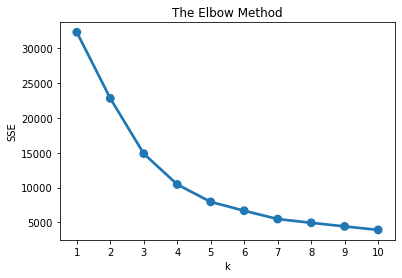

In [122]:
# K means clustering
# Choose k-number
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
warnings.filterwarnings('ignore')

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Products_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [123]:
# apply k means clustering with 3 clusters
model_product = KMeans(n_clusters=3, random_state=42)
model_product.fit(Products_normalized)
model_product.labels_.shape

(10767,)

In [124]:
# cluster analysis
Products["Cluster"] = model_product.labels_
Products.head()

,trans_freq,avg_promo_prop,revenue,Cluster
prod_id,,,,
145519008,421,0.217835,730.97,2
145519009,682,0.213844,1245.97,2
145519010,353,0.231775,602.13,2
145519011,421,0.225604,731.82,2
145519012,787,0.206429,1575.83,2


In [125]:
# summary statistics about the clusters
Products.groupby('Cluster').agg({
    'trans_freq':'mean',
    'avg_promo_prop':'mean',
    'revenue':['mean', 'count']}).round(1)


trans_freq avg_promo_prop   revenue      
              mean           mean      mean count
Cluster                                          
0          89595.5            0.3  180990.8    69
1           1568.2            0.7    4138.0  4469
2           2637.1            0.2    5013.4  6229

In [129]:
# only keep the "Cluster" column, then merge with the main dataframe all_df
Products_new = Products.drop(['trans_freq','avg_promo_prop','revenue'],axis=1)

#prod_seg = pd.merge(all_df,Products_new, on='prod_id')

In [130]:
# see which category occur most in cluster 0 and 1
Products1 = pd.merge(Products_new, product, on ='prod_id')

In [138]:
# 
p1 = Products1[Products1['Cluster']==2]
p1.head(20)

,prod_id,Cluster,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng
0,145519008,2,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
1,145519009,2,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
2,145519010,2,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
3,145519011,2,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
4,145519012,2,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
6,152576008,2,93968,IOGURTE BIFIDUS MAGR,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
7,152576009,2,93968,IOGURTE BIFIDUS MAGR,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
8,152576010,2,93968,IOGURTE BIFIDUS MAGR,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
9,152576011,2,93968,IOGURTE BIFIDUS MAGR,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
12,152761004,2,93992,IOGURTE LIQUIDO,95857,IOGURTE BEBIDA,DAN UP,YOGURT DRINK


In [25]:
# find which category occur the most 
p1['category_id'].mode() # 95064
p1[p1['category_id']==95890] # fresh pork

,prod_id,Cluster,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng


In [26]:
# merge the clusters assignment with the "all_df" dataframe
# so that the new dataframe will have the cluster label for product
prod_seg = pd.merge(all_df,Products_new,on='prod_id')

### Customer Segmentation

#### Segmentation based on category "FINE WINES"

In [30]:
# filter the customer data with only category "FINE WINES"
wine = all_df[all_df['category_desc_eng']=='FINE WINES']

In [31]:
wine.head()

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,...,prod_unit_price,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng,total_promo,promo_prop,id
823455,2369804,2.017121e+18,2017-12-12,335,999143215,CT,7.98,2.0,0.00,0,...,3.99,93679,VINHO REGIAO ALENTEJ,95797,VINHOS FINOS,PORTA DA RAVESSA,FINE WINES,0.00,0.0,65551
823456,2369804,2.017122e+18,2017-12-17,335,999143215,CT,3.99,1.0,-0.80,2,...,3.99,93679,VINHO REGIAO ALENTEJ,95797,VINHOS FINOS,PORTA DA RAVESSA,FINE WINES,0.80,2.0,65555
823457,3269902,2.017121e+18,2017-12-13,483,999143215,CT,3.99,1.0,0.00,0,...,3.99,93679,VINHO REGIAO ALENTEJ,95797,VINHOS FINOS,PORTA DA RAVESSA,FINE WINES,0.00,0.0,92091
823458,4459947,2.017121e+18,2017-12-07,301,999143215,CT,8.98,1.0,-4.99,1,...,8.98,93679,VINHO REGIAO ALENTEJ,95797,VINHOS FINOS,PORTA DA RAVESSA,FINE WINES,4.99,1.0,127333
823459,4589591,2.017122e+18,2017-12-21,654,999143215,CT,3.99,1.0,0.00,0,...,3.99,93679,VINHO REGIAO ALENTEJ,95797,VINHOS FINOS,PORTA DA RAVESSA,FINE WINES,0.00,0.0,130726


In [32]:
# Recency, Frequency, and promo_proportion

# Convert to show date only

wine['tran_dt'] = pd.to_datetime(wine['tran_dt'], format='%Y-%m-%d')

import datetime as dt
NOW = dt.datetime(2018,1,1)

# aggregate data by each customer
wine_customers = wine.groupby(['cust_id']).agg({
    'tran_dt': lambda x: (NOW - x.max()).days,
    'id': 'count',
    'promo_prop': 'mean'}) 

# Rename columns
wine_customers.rename(columns = {'tran_dt': 'Recency',
                            'id': 'Frequency',
                            'promo_prop': 'PromotionPercentage'}, inplace=True)

In [33]:
wine_customers

,Recency,Frequency,PromotionPercentage
cust_id,,,
29568,10,11,0.257576
29909,19,81,0.446914
39774,39,24,0.517361
39856,295,6,0.333333
59984,17,53,0.324423
...,...,...,...
99969716,6,10,0.300000
99969769,52,22,0.300000
99989975,16,15,0.566667


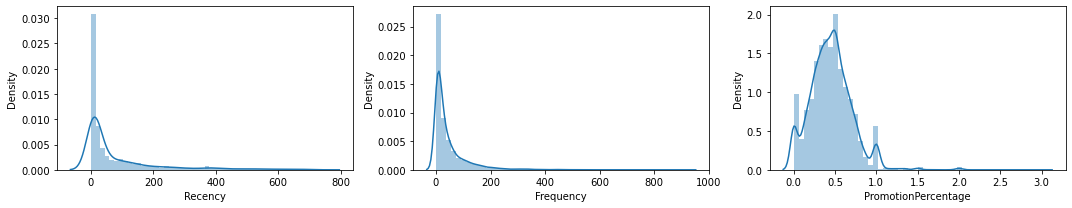

In [34]:
# manage skewness and scaling
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(wine_customers['Recency'], ax=ax[0])
sns.distplot(wine_customers['Frequency'], ax=ax[1])
sns.distplot(wine_customers['PromotionPercentage'], ax=ax[2])
plt.tight_layout()
plt.show()

In [35]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(wine_customers[x], ax=ax[0,0])
    sns.distplot(np.log(wine_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(wine_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(wine_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(wine_customers[x].skew().round(2))
    print(np.log(wine_customers[x]).skew().round(2))
    print(np.sqrt(wine_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(wine_customers[x])[0]).skew().round(2))

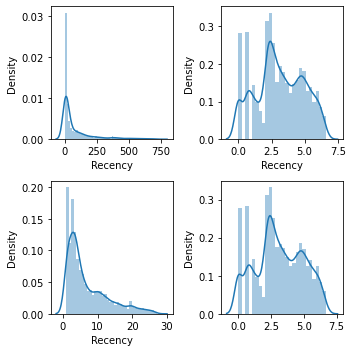

2.37
-0.01
1.3
-0.0


In [36]:
analyze_skewness('Recency')

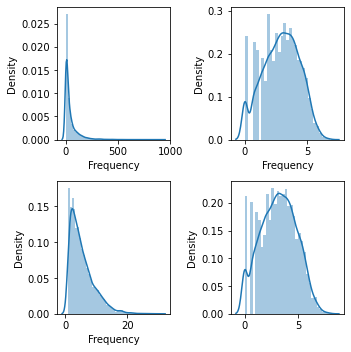

3.92
-0.14
1.44
-0.01


In [37]:
analyze_skewness('Frequency')

In [38]:
# use boxcox to correct the skewness
wine_customers["Recency"] = stats.boxcox(wine_customers['Recency'])[0]
wine_customers["Frequency"] = stats.boxcox(wine_customers['Frequency'])[0]

In [39]:
wine_customers

,Recency,Frequency,PromotionPercentage
cust_id,,,
29568,2.312771,2.529534,0.257576
29909,2.961108,4.850095,0.446914
39774,3.689391,3.412013,0.517361
39856,5.749377,1.864596,0.333333
59984,2.848645,4.339835,0.324423
...,...,...,...
99969716,1.797923,2.423794,0.300000
99969769,3.981300,3.312076,0.300000
99989975,2.787366,2.876729,0.566667


In [40]:
# Normalize/Scale the Variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine_customers)
wine_customers_normalized = scaler.transform(wine_customers)
print(wine_customers_normalized.mean(axis = 0).round(2))
print(wine_customers_normalized.std(axis = 0).round(2))

[0. 0. 0.]
[1. 1. 1.]


In [41]:
pd.DataFrame(wine_customers_normalized).head()

,0,1,2
0,-0.465645,-0.375872,-0.764995
1,-0.102607,1.036867,-0.017342
2,0.305196,0.161374,0.260839
3,1.458690,-0.780682,-0.465845
4,-0.165581,0.726225,-0.501028


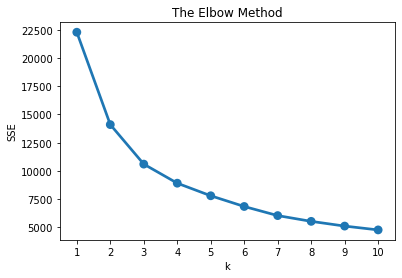

In [42]:
# K means clustering
# Choose k-number
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(wine_customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [43]:
# apply k means clustering with 3 clusters
model_wine = KMeans(n_clusters=3, random_state=40)
model_wine.fit(wine_customers_normalized)
model_wine.labels_.shape

(7426,)

In [44]:
# cluster analysis
wine_customers["Cluster"] = model_wine.labels_
wine_customers.head()

,Recency,Frequency,PromotionPercentage,Cluster
cust_id,,,,
29568,2.312771,2.529534,0.257576,0
29909,2.961108,4.850095,0.446914,1
39774,3.689391,3.412013,0.517361,1
39856,5.749377,1.864596,0.333333,0
59984,2.848645,4.339835,0.324423,1


In [45]:
# summary statistics about wine customers
wine_customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'PromotionPercentage':['mean', 'count']}).round(1)

Recency Frequency PromotionPercentage      
           mean      mean                mean count
Cluster                                            
0           4.6       1.9                 0.3  2417
1           1.9       4.3                 0.5  3817
2           4.3       1.9                 0.8  1192

In [46]:
# snake plots
df_normalized = pd.DataFrame(wine_customers_normalized, columns=['Recency', 'Frequency', 'PromotionPercentage'])
df_normalized['ID'] = wine_customers.index
df_normalized['Cluster'] = model_wine.labels_
df_normalized.head()

,Recency,Frequency,PromotionPercentage,ID,Cluster
0,-0.465645,-0.375872,-0.764995,29568,0
1,-0.102607,1.036867,-0.017342,29909,1
2,0.305196,0.161374,0.260839,39774,1
3,1.458690,-0.780682,-0.465845,39856,0
4,-0.165581,0.726225,-0.501028,59984,1


In [47]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','PromotionPercentage'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# pay amount, percentage discount of the customers 

,ID,Cluster,Attribute,Value
0,29568,0,Recency,-0.465645
1,29909,1,Recency,-0.102607
2,39774,1,Recency,0.305196
3,39856,0,Recency,1.458690
4,59984,1,Recency,-0.165581


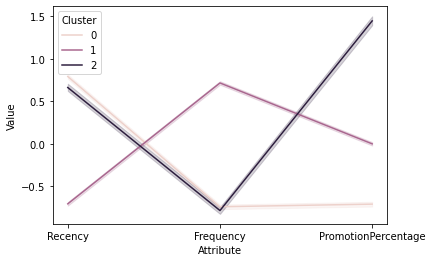

In [140]:
f1 = sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)
f1.figure.savefig("output.png")

In [49]:
# From the plot above, it seems like that 
# cluster 0: recently bought wine, not frequent, lowest on promotion coverage
# cluster 1: not recently bought wine, very frequent, medium on promotion coverage
# cluster 2: recently bought wine, not frequent,very high on promotion coverage

#### Define Cherry Pickers and Most Valuable Customers in All Products

In [50]:
## General Cherry Pickers and Most-Valuable Customers
discount = all_df.groupby(['cust_id']).agg({'promo_prop':'mean'})
discount = discount.rename(columns = {'promo_prop':
                                     'avg_discount_prop'})
discount.describe()

,avg_discount_prop
count,7920.000000
mean,0.309202
std,0.081937
min,0.056667
25%,0.251723
50%,0.301666
75%,0.357431
max,0.873356


In [51]:
# Identify the most valuable and cherry pickers
discount['avg_discount_prop'].quantile(0.05) # 0.20
discount['avg_discount_prop'].quantile(0.95) # 0.45
discount.head()

# less then 0.20 most-valuable
# more than 0.45 cherry pickers

,avg_discount_prop
cust_id,
29568,0.201993
29909,0.305978
39774,0.389340
39856,0.243685
59984,0.267236


In [52]:
# re_label the customers based on avg_discount_prop
# create a list of conditions
conditions = [
    (discount['avg_discount_prop'] <=0.2),
    (discount['avg_discount_prop'] >0.2) & (discount['avg_discount_prop'] < 0.45),
    (discount['avg_discount_prop'] >= 0.45)
]

# create a list of the values we want to assign for each condition
values = ['most_valuable', 'normal', 'cherry_picker']

# create a new column and use np.select to assign values to it using our lists as arguments
discount['cust_category'] = np.select(conditions, values)
discount.head()

,avg_discount_prop,cust_category
cust_id,,
29568,0.201993,normal
29909,0.305978,normal
39774,0.389340,normal
39856,0.243685,normal
59984,0.267236,normal


### Store Segmentation
Segmentation based on customers category (cherry picker, normal, most valuable)

In [53]:
all_df.head()

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,...,prod_unit_price,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng,total_promo,promo_prop,id
0,139662,2.017110e+18,2017-11-03,584,145519008,CT,2.89,4.0,0.00,0,...,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,0.00,0.00,3497
1,799924,2.017111e+18,2017-11-12,349,145519008,CT,2.89,4.0,-1.45,1,...,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,19267
2,1399898,2.017102e+18,2017-10-21,684,145519008,CT,2.89,4.0,-1.45,1,...,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,38575
3,1399898,2.017111e+18,2017-11-11,684,145519008,CT,2.89,4.0,-1.45,1,...,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,38589
4,1399898,2.017121e+18,2017-12-05,684,145519008,CT,2.89,4.0,-1.45,1,...,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,38611


In [54]:
# Which stores rank the highest in volumes, revenues, profits, transactions, customers, etc.?
# revenue, profit, transactions, customers
all_df['profit'] = all_df['tran_prod_paid_amt'] * 0.12
trans_store = all_df.groupby(['store_id']).agg({'tran_prod_sale_qty':'sum','tran_prod_paid_amt':'sum','profit':'sum',
                                                'id':'count','prod_id':'nunique','promo_prop':'mean'
                                               })
trans_store = trans_store.rename(columns={'tran_prod_sale_qty':'volume','tran_prod_paid_amt':'revenue_by_store',
                                          'id':'tran_frequency',
                                          'prod_id':'number_unique_product',
                                         'promo_prop':'promo_avg'})

# best stores based on revenue
trans_store.sort_values(by='revenue_by_store',ascending=False).head() 

,volume,revenue_by_store,profit,tran_frequency,number_unique_product,promo_avg
store_id,,,,,,
342,670290.662,786520.95,94382.5140,363011,9521,0.302046
345,518803.903,718779.77,86253.5724,299550,9519,0.345247
349,559421.824,680640.41,81676.8492,306796,9273,0.373387
344,491200.375,624991.67,74999.0004,274151,9431,0.363338
343,458829.587,591942.18,71033.0616,244279,9056,0.370381


In [55]:
# best stores based on volume
trans_store.sort_values(by='volume',ascending=False).head() 

,volume,revenue_by_store,profit,tran_frequency,number_unique_product,promo_avg
store_id,,,,,,
342,670290.662,786520.95,94382.5140,363011,9521,0.302046
349,559421.824,680640.41,81676.8492,306796,9273,0.373387
345,518803.903,718779.77,86253.5724,299550,9519,0.345247
344,491200.375,624991.67,74999.0004,274151,9431,0.363338
347,490057.181,551868.55,66224.2260,270329,9042,0.336980


In [56]:
# best stores based on number of transactions
trans_store.sort_values(by='tran_frequency',ascending=False).head() 

,volume,revenue_by_store,profit,tran_frequency,number_unique_product,promo_avg
store_id,,,,,,
342,670290.662,786520.95,94382.5140,363011,9521,0.302046
349,559421.824,680640.41,81676.8492,306796,9273,0.373387
345,518803.903,718779.77,86253.5724,299550,9519,0.345247
344,491200.375,624991.67,74999.0004,274151,9431,0.363338
347,490057.181,551868.55,66224.2260,270329,9042,0.336980


In [57]:
# best stores based on number of unique product
trans_store.sort_values(by='number_unique_product',ascending=False).head() 

,volume,revenue_by_store,profit,tran_frequency,number_unique_product,promo_avg
store_id,,,,,,
342,670290.662,786520.95,94382.5140,363011,9521,0.302046
345,518803.903,718779.77,86253.5724,299550,9519,0.345247
344,491200.375,624991.67,74999.0004,274151,9431,0.363338
341,446221.256,580609.20,69673.1040,250529,9342,0.357754
349,559421.824,680640.41,81676.8492,306796,9273,0.373387


In [58]:
# best stores based on average promotion 
trans_store.sort_values(by='promo_avg',ascending=False).head() 

,volume,revenue_by_store,profit,tran_frequency,number_unique_product,promo_avg
store_id,,,,,,
469,258.386,420.13,50.4156,188,165,0.699526
169,7224.564,9896.47,1187.5764,4432,1667,0.513727
470,1653.756,2333.98,280.0776,1017,628,0.447355
354,3842.867,5596.19,671.5428,2335,1261,0.437110
352,6505.838,8066.12,967.9344,3985,1622,0.425186


In [59]:
# store frequency by most valuable / cherry pickers customers
# merge the "cust_category" into the main data frame

all_new = pd.merge(all_df,discount, on='cust_id')
dummy = pd.get_dummies(all_new['cust_category'])
dummy.head()

,cherry_picker,most_valuable,normal
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [60]:
# merge the dummmy with the new dataframe
# dummy
all_new = pd.concat([all_new,dummy],axis=1)
all_new.head()

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,...,category_desc_eng,total_promo,promo_prop,id,profit,avg_discount_prop,cust_category,cherry_picker,most_valuable,normal
0,139662,2.017110e+18,2017-11-03,584,145519008,CT,2.89,4.0,0.0,0,...,YOGURT HEALTH,0.0,0.00,3497,0.3468,0.228537,normal,0,0,1
1,139662,2.017112e+18,2017-11-14,584,148066012,CT,2.18,2.0,0.0,0,...,YOGURT SPECIALTIES,0.0,0.00,3504,0.2616,0.228537,normal,0,0,1
2,139662,2.017093e+18,2017-09-25,584,152576008,CT,2.79,4.0,0.0,0,...,YOGURT HEALTH,0.0,0.00,3468,0.3348,0.228537,normal,0,0,1
3,139662,2.017081e+18,2017-08-05,584,153701006,CT,2.79,4.0,-1.4,1,...,YOGURT HEALTH,1.4,0.25,3431,0.1668,0.228537,normal,0,0,1
4,139662,2.017092e+18,2017-09-17,161,153701006,CT,2.79,4.0,-1.4,1,...,YOGURT HEALTH,1.4,0.25,3463,0.1668,0.228537,normal,0,0,1


In [61]:
### Store visit most frequent by cherry pickers
store_cp = all_new.groupby(['store_id']).agg({'cherry_picker':'sum','normal':'sum','most_valuable':'sum'})
store_cp = store_cp.rename(columns={'cherry_picker':'num_cherry_picker','normal':'num_normal',
                                          'most_valuable':'num_most_valuable'
                                         })

# best stores based on number of cherry pickers
store_cp.sort_values(by='num_cherry_picker',ascending=False).head() 

,num_cherry_picker,num_normal,num_most_valuable
store_id,,,
349,43818.0,256617.0,6361.0
344,36544.0,232496.0,5111.0
331,33373.0,115834.0,3694.0
343,33118.0,206633.0,4528.0
347,27412.0,231344.0,11573.0


In [62]:
# best stores based on number of normal customers
store_cp.sort_values(by='num_normal',ascending=False).head() 

,num_cherry_picker,num_normal,num_most_valuable
store_id,,,
342,11390.0,315636.0,35985.0
345,25208.0,261286.0,13056.0
349,43818.0,256617.0,6361.0
588,11910.0,238404.0,8168.0
344,36544.0,232496.0,5111.0


In [63]:
# best stores based on number of most valuable customers
store_cp.sort_values(by='num_most_valuable',ascending=False).head() 

,num_cherry_picker,num_normal,num_most_valuable
store_id,,,
342,11390.0,315636.0,35985.0
994,10190.0,163112.0,29555.0
989,4685.0,93344.0,24858.0
190,4897.0,76668.0,21405.0
596,72.0,64868.0,19768.0


In [64]:
all_new

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,...,category_desc_eng,total_promo,promo_prop,id,profit,avg_discount_prop,cust_category,cherry_picker,most_valuable,normal
0,139662,2.017110e+18,2017-11-03,584,145519008,CT,2.89,4.0,0.0,0,...,YOGURT HEALTH,0.0,0.00,3497,0.3468,0.228537,normal,0,0,1
1,139662,2.017112e+18,2017-11-14,584,148066012,CT,2.18,2.0,0.0,0,...,YOGURT SPECIALTIES,0.0,0.00,3504,0.2616,0.228537,normal,0,0,1
2,139662,2.017093e+18,2017-09-25,584,152576008,CT,2.79,4.0,0.0,0,...,YOGURT HEALTH,0.0,0.00,3468,0.3348,0.228537,normal,0,0,1
3,139662,2.017081e+18,2017-08-05,584,153701006,CT,2.79,4.0,-1.4,1,...,YOGURT HEALTH,1.4,0.25,3431,0.1668,0.228537,normal,0,0,1
4,139662,2.017092e+18,2017-09-17,161,153701006,CT,2.79,4.0,-1.4,1,...,YOGURT HEALTH,1.4,0.25,3463,0.1668,0.228537,normal,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29617070,85429551,2.017022e+18,2017-02-16,541,999986470,CT,2.89,1.0,0.0,0,...,"CAFES, MIXTURES AND SOLVABLE SOLVENTS",0.0,0.00,2293573,0.3468,0.143921,most_valuable,0,1,0
29617071,85429551,2.016103e+18,2016-10-27,541,999986547,CT,5.20,4.0,0.0,0,...,"CAFES, MIXTURES AND SOLVABLE SOLVENTS",0.0,0.00,2293537,0.6240,0.143921,most_valuable,0,1,0
29617072,85429551,2.017011e+18,2017-01-06,541,999986547,CT,3.90,3.0,0.0,0,...,"CAFES, MIXTURES AND SOLVABLE SOLVENTS",0.0,0.00,2293561,0.4680,0.143921,most_valuable,0,1,0
29617073,85429551,2.017061e+18,2017-06-13,541,999992564,CT,4.00,4.0,0.0,0,...,PACKAGED BREAD,0.0,0.00,2293614,0.4800,0.143921,most_valuable,0,1,0


In [65]:
# Criteria to define the store clusters

# aggregate data by each store
stores = all_new.groupby(['store_id']).agg({
    'cherry_picker': 'sum',
    'most_valuable': 'sum',
    'normal': 'sum'})

# Rename columns
stores.rename(columns = {'cherry_picker': 'num_cherry_picker',
                            'most_valuable': 'num_most_valuable',
                            'normal': 'num_normal'}, inplace=True)


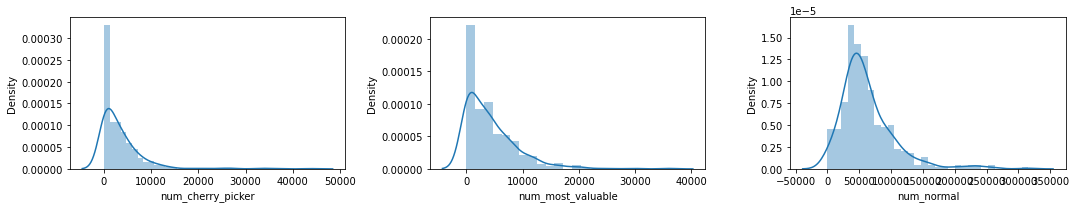

In [66]:
# manage skewness and scaling
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(stores['num_cherry_picker'], ax=ax[0])
sns.distplot(stores['num_most_valuable'], ax=ax[1])
sns.distplot(stores['num_normal'], ax=ax[2])
plt.tight_layout()
plt.show() #Pretty Normal

In [67]:
# Normalize/Scale the Variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(stores)
stores_normalized = scaler.transform(stores)
print(stores_normalized.mean(axis = 0).round(2))
print(stores_normalized.std(axis = 0).round(2))

[ 0. -0.  0.]
[1. 1. 1.]


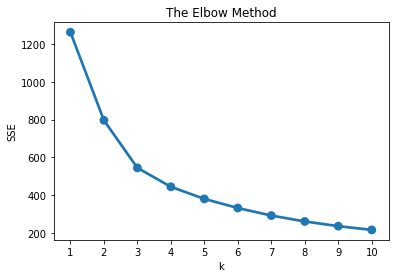

In [68]:
# K means clustering
# Choose k-number
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(stores_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [69]:
# apply k means clustering with 3 clusters
model_store = KMeans(n_clusters=3, random_state=42)
model_store.fit(stores_normalized)
model_store.labels_.shape

(421,)

In [70]:
# cluster analysis
stores["store_cluster"] = model_store.labels_
stores.head()

,num_cherry_picker,num_most_valuable,num_normal,store_cluster
store_id,,,,
102,0.0,0.0,2.0,0
137,50.0,3279.0,39435.0,0
141,202.0,3160.0,50574.0,0
143,4725.0,12204.0,41912.0,1
145,0.0,6942.0,62827.0,1


In [71]:
stores.groupby('store_cluster').agg({
    'num_cherry_picker':'mean',
    'num_most_valuable':'mean',
    'num_normal':['mean', 'count']}).round(1)

num_cherry_picker num_most_valuable num_normal      
                           mean              mean       mean count
store_cluster                                                     
0                        2283.6            2138.0    43928.2   293
1                        4262.7            9211.4    91839.9   114
2                       24137.6           10005.2   211914.1    14

In [72]:
stores

,num_cherry_picker,num_most_valuable,num_normal,store_cluster
store_id,,,,
102,0.0,0.0,2.0,0
137,50.0,3279.0,39435.0,0
141,202.0,3160.0,50574.0,0
143,4725.0,12204.0,41912.0,1
145,0.0,6942.0,62827.0,1
...,...,...,...,...
993,63.0,3462.0,26996.0,0
994,10190.0,29555.0,163112.0,1
996,39.0,16731.0,154948.0,1


In [73]:
all_df['store_id'].nunique()

421